<a href="https://colab.research.google.com/github/giovanirojascuela/2025_5TO01/blob/Brenda/TALLER/Dia%2002/EJERCICIO_05_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

EJERCICIO 01 REGRESION LINEAS USANDO PANDAS Y OTRAS LIBRERIAS

In [3]:
from ast import increment_lineno
#IMPORTANDO LIBRERIAS Y DATASET
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Change 'increment_line' to a valid matplotlib backend, like 'inline'
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
#IMPORTANDO DATASET
data=pd.read_csv('./articulos_ml.csv')
data

,Title,url,Word count,# of Links,# of comments,# Images video,Elapsed days,# Shares
0,What is Machine Learning and how do we use it ...,https://blog.signals.network/what-is-machine-l...,1888,1,2.0,2,34,200000
1,10 Companies Using Machine Learning in Cool Ways,NaN,1742,9,NaN,9,5,25000
2,How Artificial Intelligence Is Revolutionizing...,NaN,962,6,0.0,1,10,42000
3,Dbrain and the Blockchain of Artificial Intell...,NaN,1221,3,NaN,2,68,200000
4,Nasa finds entire solar system filled with eig...,NaN,2039,1,104.0,4,131,200000
...,...,...,...,...,...,...,...,...
156,[Log] 83: How Google Uses Machine Learning And...,[Log] 83: http://feedproxy.google.com/~r/Techc...,3239,3,11.0,1,84,3239
157,[Log] 84: Zuck Knows If You've Been Bad Or Goo...,[Log] 84: http://feedproxy.google.com/~r/Techc...,2566,3,8.0,4,85,25019
158,[Log] 85: Microsoft Improves Windows Phone Voi...,[Log] 85: http://feedproxy.google.com/~r/Techc...,2089,4,4.0,1,86,49614
159,[Log] 86: How Google's Acquisition Of DNNresea...,[Log] 86: http://feedproxy.google.com/~r/Techc...,1530,4,12.0,3,87,33660


In [5]:
#DESCRIBIENDO LOS DATOS
data.describe()

,Word count,# of Links,# of comments,# Images video,Elapsed days,# Shares
count,161.000000,161.000000,129.000000,161.000000,161.000000,161.000000
mean,1808.260870,9.739130,8.782946,3.670807,98.124224,27948.347826
std,1141.919385,47.271625,13.142822,3.418290,114.337535,43408.006839
min,250.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,990.000000,3.000000,2.000000,1.000000,31.000000,2800.000000
50%,1674.000000,5.000000,6.000000,3.000000,62.000000,16458.000000
75%,2369.000000,7.000000,12.000000,5.000000,124.000000,35691.000000
max,8401.000000,600.000000,104.000000,22.000000,1002.000000,350000.000000


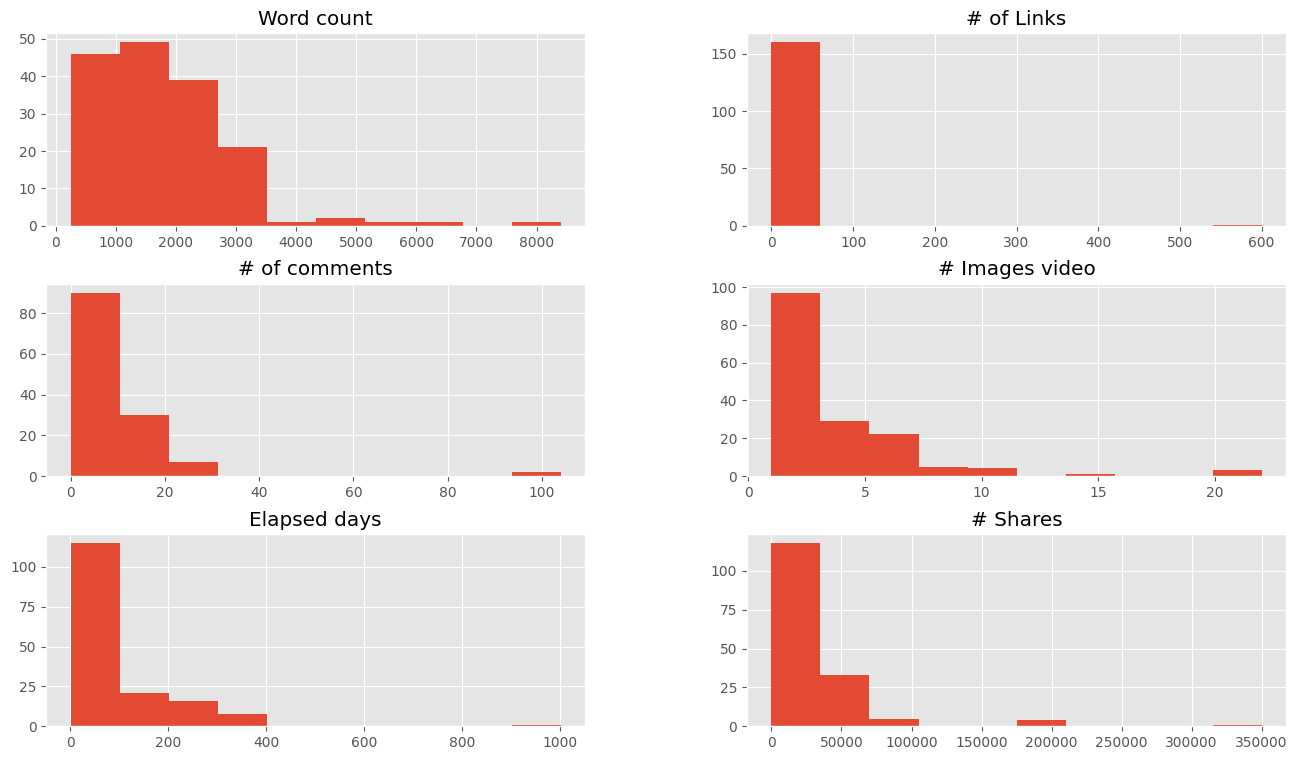

In [6]:
#GRAFICO PARA VISUALIZAR  LOS DATOS
#ANALISIS EXPLORATORIO
#GRAFICO PARA VISUALIZAR  LOS DATOS
#ANALISIS EXPLORATORIO
cols_to_drop = ['Title', 'url', 'Elapsed', 'days']
cols_existentes = [col for col in cols_to_drop if col in data.columns]

data.drop(columns=cols_existentes).hist()
plt.show()


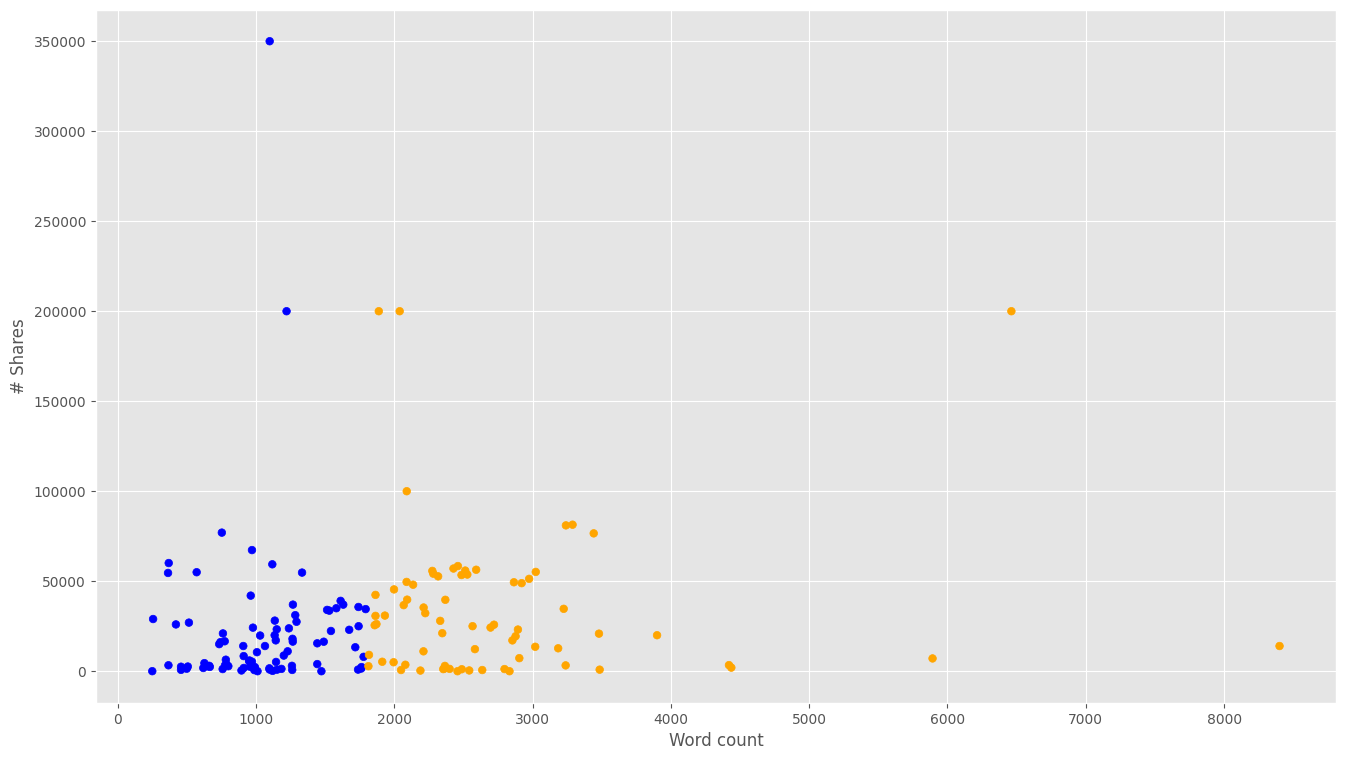

In [8]:
#GRAFICO
colores=['orange','blue']
Tamanios=[30,60]
f1=data['Word count'].values
f2=data['# Shares'].values
asignar=[]
for index,row in data.iterrows():
    if(row['Word count']>1808):
        asignar.append(colores[0])
    else:
        asignar.append(colores[1])
plt.scatter(f1,f2,c=asignar,s=Tamanios[0])
plt.xlabel('Word count')
plt.ylabel('# Shares')
plt.show()

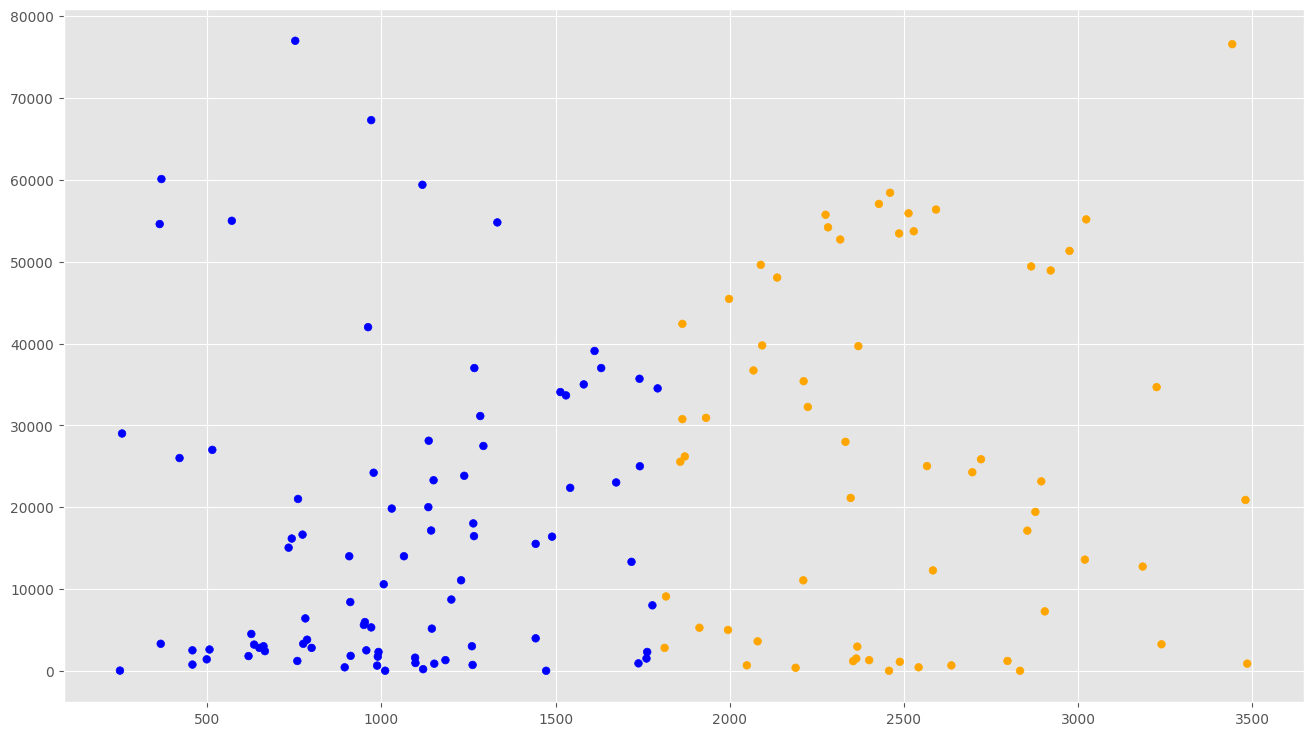

In [12]:
#FILTRAR INFORMACION RELEVANTE
filtro_data=data[(data['Word count']<=3500)&(data['# Shares']<=80000)]
f1=filtro_data['Word count'].values
f2=filtro_data['# Shares'].values
asignar=[]
for index,row in filtro_data.iterrows():
    if(row['Word count']>1808):
        asignar.append(colores[0])
    else:
        asignar.append(colores[1])
# Move the plotting calls outside the loop
plt.scatter(f1,f2,c=asignar,s=Tamanios[0])
plt.show()

In [13]:
#VALORES ESTADISTICOS
filtro_data.describe()

,Word count,# of Links,# of comments,# Images video,Elapsed days,# Shares
count,148.000000,148.000000,121.000000,148.000000,148.000000,148.000000
mean,1640.209459,5.743243,7.256198,3.331081,91.554054,20545.648649
std,821.975365,6.064418,6.346297,2.706476,91.143923,19933.865031
min,250.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,971.000000,3.000000,2.000000,1.000000,28.750000,2750.000000
50%,1536.000000,5.000000,6.000000,3.000000,60.000000,15836.000000
75%,2335.750000,7.000000,11.000000,4.000000,110.500000,34177.500000
max,3485.000000,49.000000,30.000000,22.000000,349.000000,77000.000000


In [14]:
#APLICAR EL MODELO REGRESION LINEAL
regresion=linear_model.LinearRegression()
#DECLARAR VARIABLE
dataX=filtro_data[['Word count']]
X_entrenamiento=np.array(dataX)
Y_entrenamiento=filtro_data['# Shares'].values
#ENTRENAR EL MODELO
regresion.fit(X_entrenamiento,Y_entrenamiento)
#HACER PREDICCION
y_pred=regresion.predict(X_entrenamiento)

In [19]:
#MOSTRAR COEFICIENTES
print("coeficiente: \n",regresion.coef_)
print("Termino Independiente: \n",regresion.intercept_)
print("Error Cuadrado Medio: %.2f",mean_squared_error(Y_entrenamiento,y_pred))
print("varianza: %.2f",r2_score(Y_entrenamiento,y_pred))

coeficiente: 
 [5.69765366]
Termino Independiente: 
 11200.30322307416
Error Cuadrado Medio: %.2f 372888728.3398661
varianza: %.2f 0.05519842281951404


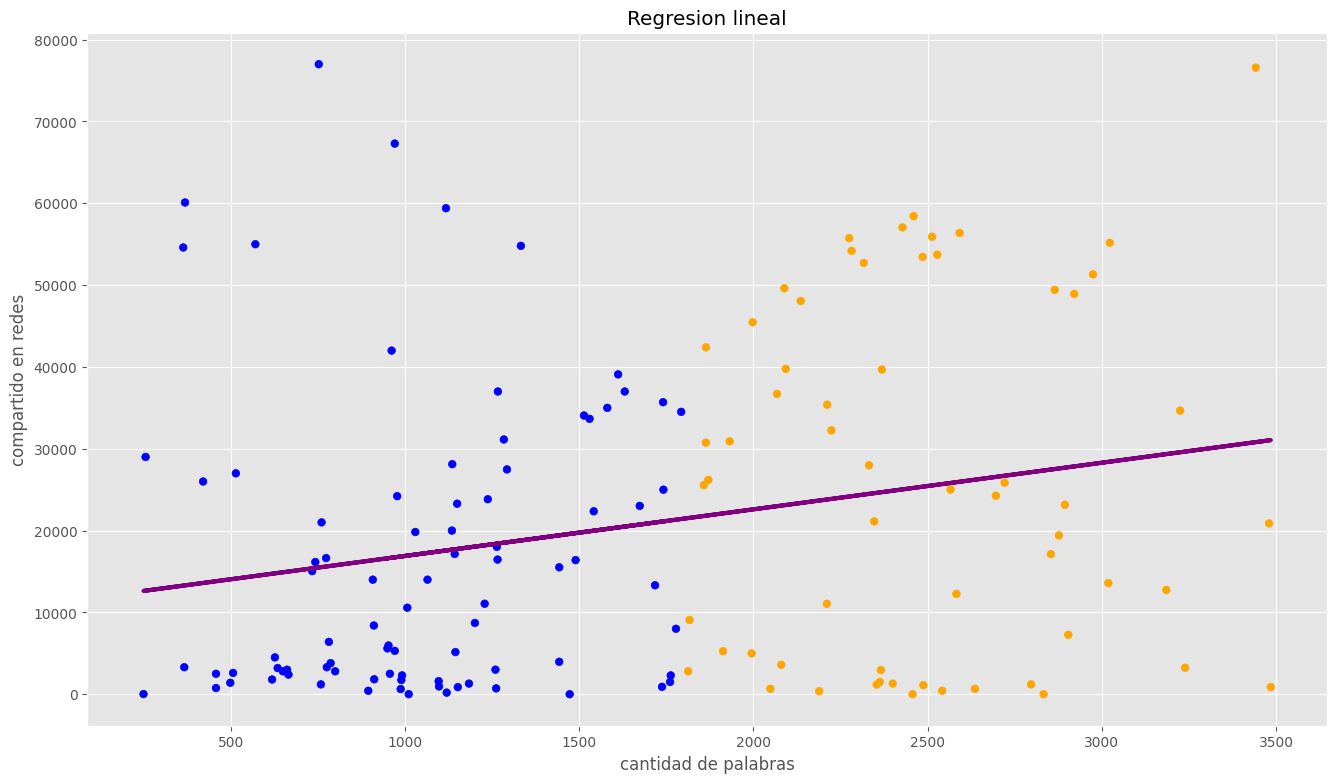

In [24]:
#GRAFICAMOS
plt.scatter(X_entrenamiento,Y_entrenamiento,c=asignar,s=Tamanios[0])
# Use the entire X_entrenamiento array for plotting the regression line
plt.plot(X_entrenamiento,y_pred,color='purple',linewidth=3)
plt.xlabel("cantidad de palabras")
plt.ylabel("compartido en redes")
plt.title("Regresion lineal")
plt.show()

In [28]:
#FILTRAMOS DATOS QUE NOS INSTERESAN PARA HACER LA REGRESION MULTIPLE
# It seems like 'datos_filtrados' was intended to be 'filtro_data'
resumen=(filtro_data['# of Links']+filtro_data['# of comments'].fillna(0)+filtro_data['# Images video'])
# Initialize datax2 before assigning values
datax2 = pd.DataFrame()
datax2['Word count']=filtro_data['Word count']
datax2['resumen']=resumen
xy_train=np.array(datax2)
z_train=filtro_data['# Shares'].values

In [32]:
#xy DIMENCIONES PARA PREDECIR Z
regresion2=linear_model.LinearRegression()
regresion2.fit(xy_train,z_train)
z_pred=regresion2.predict(xy_train)
#MOSTRAR COEFICIENTES
print("coeficiente: \n",regresion2.coef_)
print("Error Cuadrado Medio: %.2f",mean_squared_error(z_train,y_pred))
print("varianza: %.2f",r2_score(z_train,y_pred))

coeficiente: 
 [   6.63216324 -483.40753769]
Error Cuadrado Medio: %.2f 372888728.3398661
varianza: %.2f 0.05519842281951404


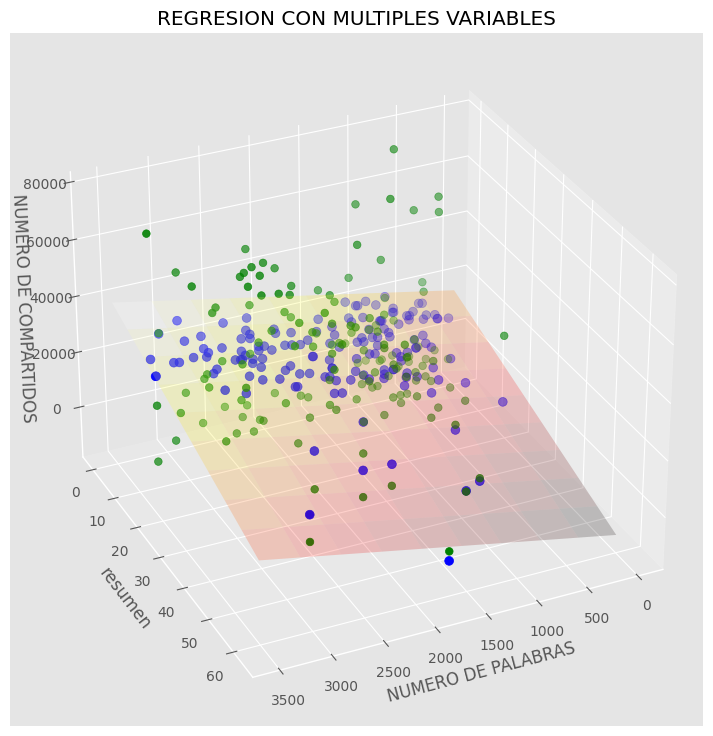

In [34]:
#GRAFICAMOS EN 3D
fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')
xx,yy=np.meshgrid(np.linspace(0,3500,num=10),np.linspace(0,60,num=10))
nuevox=regresion2.coef_[0]*xx
nuevoy=regresion2.coef_[1]*yy
z=(nuevox+nuevoy+regresion2.intercept_)
ax.plot_surface(xx,yy,z,alpha=0.2,cmap='hot')
ax.scatter(xy_train[:,0],xy_train[:,1],z_train,c='green',s=30)
ax.scatter(xy_train[:,0],xy_train[:,1],z_pred,c='blue',s=40)
ax.view_init(elev=30,azim=65)
ax.set_xlabel('NUMERO DE PALABRAS')
ax.set_ylabel('resumen')
ax.set_zlabel('NUMERO DE COMPARTIDOS')
ax.set_title('REGRESION CON MULTIPLES VARIABLES')
plt.show()